In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline
np.set_printoptions(threshold=np.inf) 

In [2]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree = file["WCTEReadoutWindows"]  

times_sorted, times_sorted_TOF, charges_sorted, mpmt_sorted, event_number_branch = functions_spills.initial_treatment(tree)

In [3]:
#root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree_sig = file["WCTEReadoutWindows"]  

times_sorted_sig, times_sorted_TOF_sig, charges_sorted_sig, mpmt_sorted_sig, event_number_branch_sig = functions_spills.initial_treatment(tree_sig)

In [4]:
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_sorted, 300, 5000, 4000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_sorted_sig, 300, 5000, 4000)

In [5]:
charge_branch_filtered = functions_spills.delete_indices_list(charges_sorted, deleted_index_dict)
charge_branch_filtered_sig = functions_spills.delete_indices_list(charges_sorted_sig, deleted_index_dict_sig)

times_TOF_filtered = functions_spills.delete_indices_list(times_sorted_TOF, deleted_index_dict)
times_TOF_filtered_sig = functions_spills.delete_indices_list(times_sorted_TOF_sig, deleted_index_dict_sig)

In [6]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 50, threshold = 5000)
times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 50, threshold = 5000)

In [7]:
times_TOF_filtered = functions_spills.delete_indices_list(times_TOF_filtered, deleted_indices)
times_TOF_filtered_sig = functions_spills.delete_indices_list(times_TOF_filtered_sig, deleted_indices_sig)

In [8]:
print(times_TOF_filtered[0][:10])
print(times_branch_modified_chargesTT[0][:10])

[ 353.57085834  478.00333567  702.40670894  721.08012573 2106.45938538
 2158.15177347 2909.09043655 3829.13518086 3836.38142506 3923.01567345]
[ 361.68167246  484.96778926  708.45884445  729.19093986 2113.24662246
 2162.07505332 2915.6588334  3839.84384063 3843.63759215 3929.36761738]


In [88]:
umbral = 0
bin_hits = 4000

times_array = np.arange(0, 270000+1, bin_hits, dtype=int)

t_RMS_TOF = np.concatenate([functions_spills.time_RMS_fun(times, bin_hits) for times in times_TOF_filtered])
t_RMS_sig_TOF = np.concatenate([functions_spills.time_RMS_fun(times, bin_hits) for times in times_TOF_filtered_sig])

# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS_TOF[~np.isnan(t_RMS_TOF)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_sig_TOF[~np.isnan(t_RMS_sig_TOF)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

print(f"for {bin_hits}, amount {np.sum(diff > umbral)}")

for 4000, amount 71


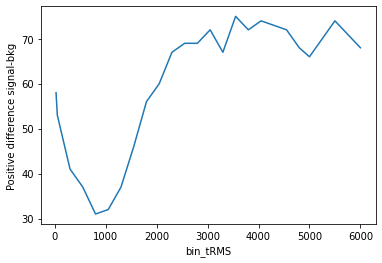

In [89]:
amount_diff = [58, 53, 41, 37, 31, 32, 37, 46, 56, 60, 67, 69, 69, 72, 67, 75, 72, 74, 73, 72, 68]
bins_list = np.arange(50, 5000, 250)
bins_list = np.insert(bins_list, 0, 25)

amount_diff.extend([66, 74, 68])      # Cambia los valores por los que quieras añadir
bins_list = np.append(bins_list, [5000, 5500, 6000])  # Añade los valores de x correspondientes

plt.figure()
plt.plot(bins_list, amount_diff)
plt.xlabel("bin_tRMS")
plt.ylabel("Positive difference signal-bkg")
plt.show()


In [90]:
t_RMS = np.concatenate([functions_spills.time_RMS_fun(times, bin_hits) for times in times_branch_modified_chargesTT])
t_RMS_sig = np.concatenate([functions_spills.time_RMS_fun(times, bin_hits) for times in times_branch_modified_chargesTT_sig])

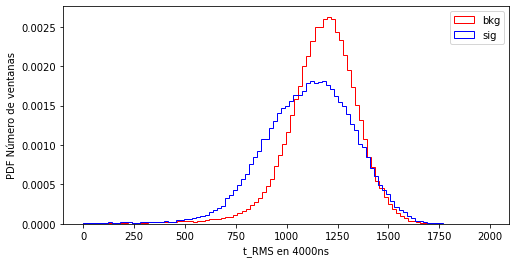

In [91]:
plt.figure(figsize=(8, 4))
plt.hist(t_RMS, bins=100, color='red', histtype='step', linewidth=1, label='bkg', density=True)
plt.hist(t_RMS_sig, bins=100, color='blue', histtype='step', linewidth=1, label='sig', density=True)
plt.xlabel(f't_RMS en {bin_hits}ns')
plt.ylabel('PDF Número de ventanas')
plt.legend()
#plt.yscale('log')
plt.show()

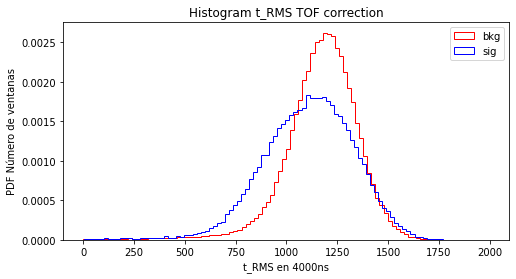

In [92]:
plt.figure(figsize=(8, 4))
plt.hist(t_RMS_TOF, bins=100, color='red', histtype='step', linewidth=1, label='bkg', density=True)
plt.hist(t_RMS_sig_TOF, bins=100, color='blue', histtype='step', linewidth=1, label='sig', density=True)
plt.xlabel(f't_RMS en {bin_hits}ns')
plt.ylabel('PDF Número de ventanas')
plt.legend()
plt.title("Histogram t_RMS TOF correction")
#plt.yscale('log')
plt.show()

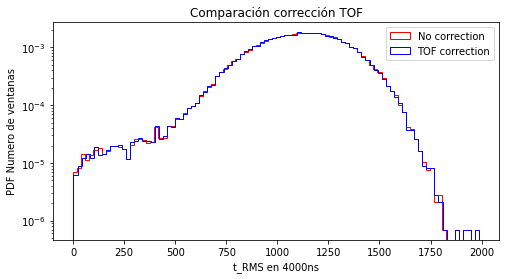

In [93]:
plt.figure(figsize=(8, 4))
plt.hist(t_RMS_sig, bins=100, color='red', histtype='step', linewidth=1, label='No correction', density=True)
plt.hist(t_RMS_sig_TOF, bins=100, color='blue', histtype='step', linewidth=1, label='TOF correction', density=True)

plt.xlabel(f't_RMS en {bin_hits}ns')
plt.ylabel('PDF Numero de ventanas')
plt.legend()
plt.title("Comparación corrección TOF")
plt.yscale('log')
plt.show()

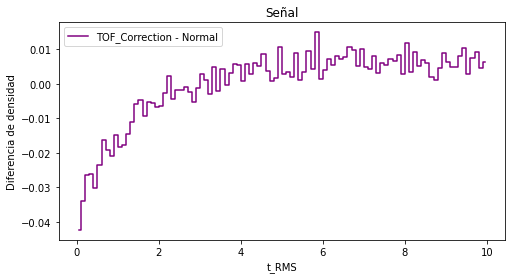

In [80]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS_sig[~np.isnan(t_RMS_sig)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_sig_TOF[~np.isnan(t_RMS_sig_TOF)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='TOF_Correction - Normal')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("Señal")
plt.show()

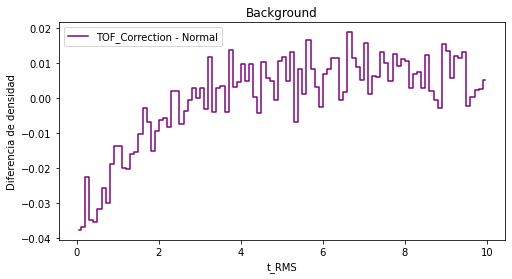

In [81]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS[~np.isnan(t_RMS)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_TOF[~np.isnan(t_RMS_TOF)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='TOF_Correction - Normal')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("Background")
plt.show()

40


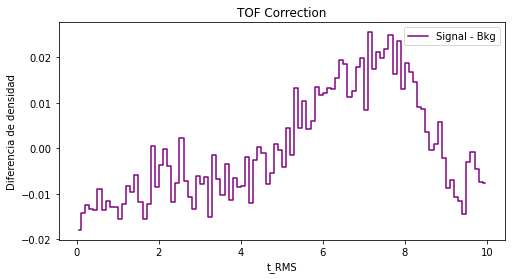

In [82]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS_TOF[~np.isnan(t_RMS_TOF)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_sig_TOF[~np.isnan(t_RMS_sig_TOF)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

print(np.sum(diff > umbral))

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='Signal - Bkg')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("TOF Correction")
plt.show()

31


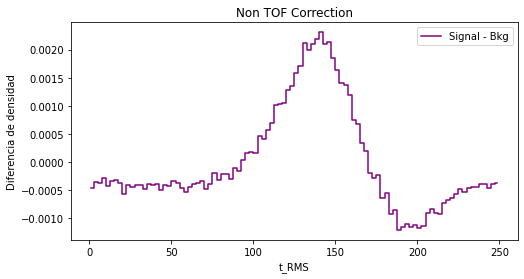

In [54]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS[~np.isnan(t_RMS)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_sig[~np.isnan(t_RMS_sig)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1
print(np.sum(diff > umbral))

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='Signal - Bkg')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("Non TOF Correction")
plt.show()

In [55]:
umbral = 0  # Ajusta este valor según tu criterio

indices_significativos = np.where(diff > umbral)[0]

for val in bins[indices_significativos]:
    print(f"{val:.4f}")

print(np.sum(diff > umbral))

92.5001
95.0000
97.5000
100.0000
102.4999
104.9999
107.4999
109.9999
112.4998
114.9998
117.4998
119.9998
122.4997
124.9997
127.4997
129.9997
132.4996
134.9996
137.4996
139.9995
142.4995
144.9995
147.4995
149.9994
152.4994
154.9994
157.4994
159.9993
162.4993
164.9993
167.4993
31


In [20]:
lower = 198
upper = 900

# Apply the filter to t_RMS and t_RMS_sig
mask = (t_RMS >= lower) & (t_RMS <= upper) & (t_RMS != np.nan)
print(mask)



[False False False False False False False False False False False  True
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False  True False False False False  True False False False
 False False  True False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False False  True False False False False False False False False
 False False False False False False False  True False False False False
 False False False  True False False  True False False False False False
 False  True False False False False  True  True False False False False
 False False False False False False False False Fa